In [53]:
# Step 1: Importing Libraries
import pandas as pd

In [54]:
# Step 2: Importing Dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"
df = pd.read_csv(url)

In [55]:
# Step 3: Getting to know your data
df.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [56]:
df.shape

(55, 12)

In [57]:
df.index

RangeIndex(start=0, stop=55, step=1)

In [58]:
df.columns

Index(['Year', 'Population', 'Total', 'Violent', 'Property', 'Murder',
       'Forcible_Rape', 'Robbery', 'Aggravated_assault', 'Burglary',
       'Larceny_Theft', 'Vehicle_Theft'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(12)
memory usage: 5.2 KB


In [60]:
# Convert the type of the column Year to datetime64
df['Decade'] =  (((df['Year']/10).astype('int'))*10)
df['Year'] = pd.to_datetime(df['Year'], format="%Y")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
Decade                55 non-null int64
dtypes: datetime64[ns](1), int64(12)
memory usage: 5.7 KB


In [62]:
# Set the Year column as the index of the dataframe
df = df.set_index('Year')

In [63]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Decade
Year,,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,1960
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,1960
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,1960
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,1960
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,1960


In [64]:
# Delete the Total column
df.drop('Total', axis = 1, inplace = True)

In [65]:
df.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Decade
Year,,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,1960
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,1960
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,1960
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,1960
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,1960


In [66]:
# Group the year by decades and sum the values
df.groupby('Decade').sum()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Decade,,,,,,,,,,
1960,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


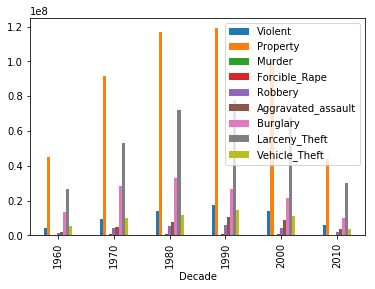

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.loc[:, df.columns != 'Population'].groupby('Decade').sum().plot(kind = 'bar')

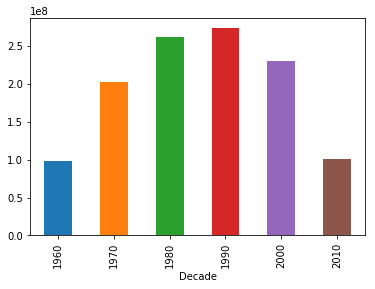

In [72]:
# What is the mos dangerous decade to live in the US?
(df.loc[:, df.columns != 'Population'].groupby('Decade').sum().sum(axis = 1)).plot(kind = 'bar')